# Explanation to wavelets

- We move and shrink the Morlet wavelet to different scales and positions.
- We calculate the convolution of the wavelet moving along the time axis.

Manim Community v0.18.1

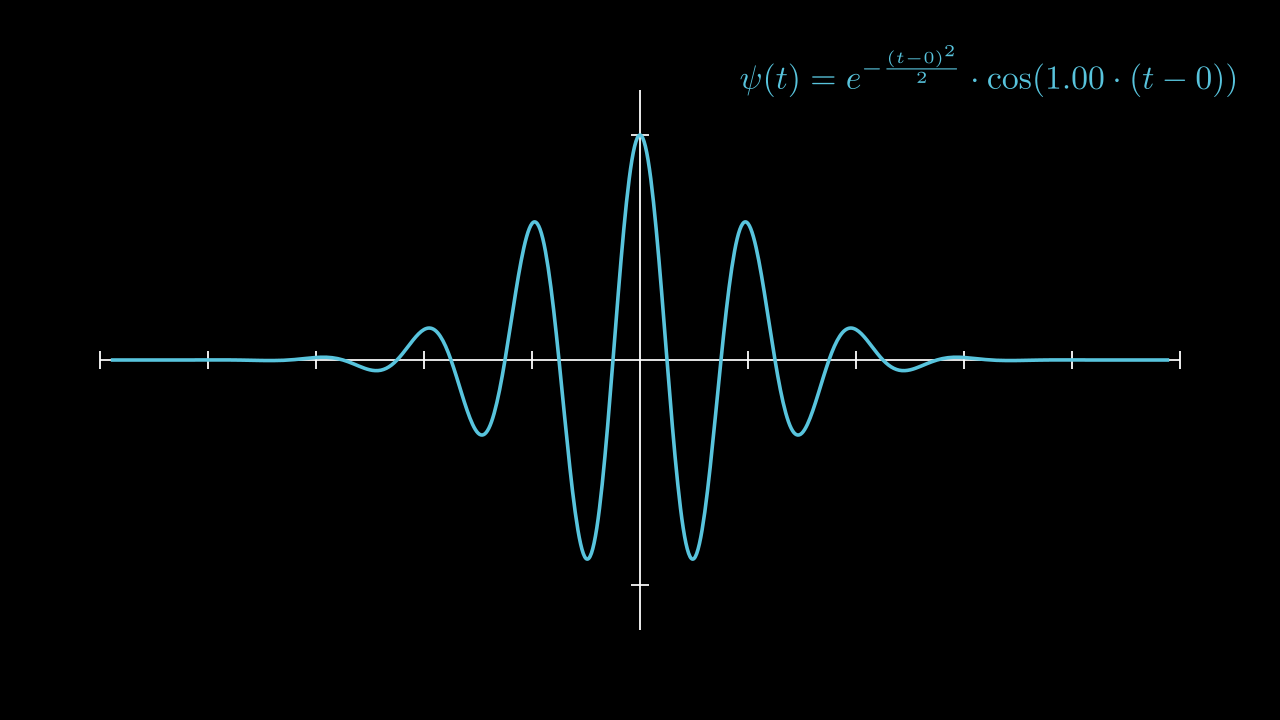

In [46]:
from typing import Callable
from itertools import chain
from manim import *


class WaveletShrinking(Scene):
    @staticmethod
    def morlet_wavelet_factory(omega: float, tau: float) -> Callable[[float], float]:
        def morlet_wavelet(t: float) -> float:
            return np.exp(-((t - tau) ** 2) / 2) * np.cos(omega * TAU * (t - tau))

        return morlet_wavelet

    def construct(self):
        axes = Axes(
            x_range=[-5, 5],
            y_range=[-1.2, 1.2],
            tips=False,
        ).center().to_edge(DOWN, LARGE_BUFF)


        frequencies = np.linspace(1, 2, 41).round(2).tolist()
        wavelet = self.morlet_wavelet_factory(omega=frequencies[0], tau=0)
        wavelet_graph = axes.plot(wavelet, [SMALL_BUFF - 5, 5 - SMALL_BUFF], color=BLUE)
        wavelet_text = MathTex(r"\psi(t) = e^{-\frac{(t - 0)^2}{2}} \cdot \cos(1.00\cdot(t - 0))", color=BLUE, font_size=36).to_corner(UR)
        self.add(axes, wavelet_graph, wavelet_text)

        for freq in chain(frequencies[1:], reversed(frequencies)):
            last_wavelet_graph = wavelet_graph
            last_wavelet_text = wavelet_text
            wavelet = self.morlet_wavelet_factory(omega=freq, tau=0)
            wavelet_graph = axes.plot(wavelet, [SMALL_BUFF - 5, 5 - SMALL_BUFF], color=BLUE)
            wavelet_text = MathTex(fr"\psi(t) = e^{{-\frac{{(t - 0)^2}}{2}}}\cdot\cos({freq:.2f}\cdot(t - 0))", color=BLUE, font_size=36).to_corner(UR)
            self.play(ReplacementTransform(last_wavelet_graph, wavelet_graph), rate_func=linear, run_time=0.1)
            self.remove(last_wavelet_text)
            self.add(wavelet_text)
        

%manim -qm -s -v  WARNING WaveletShrinking

Manim Community v0.18.1

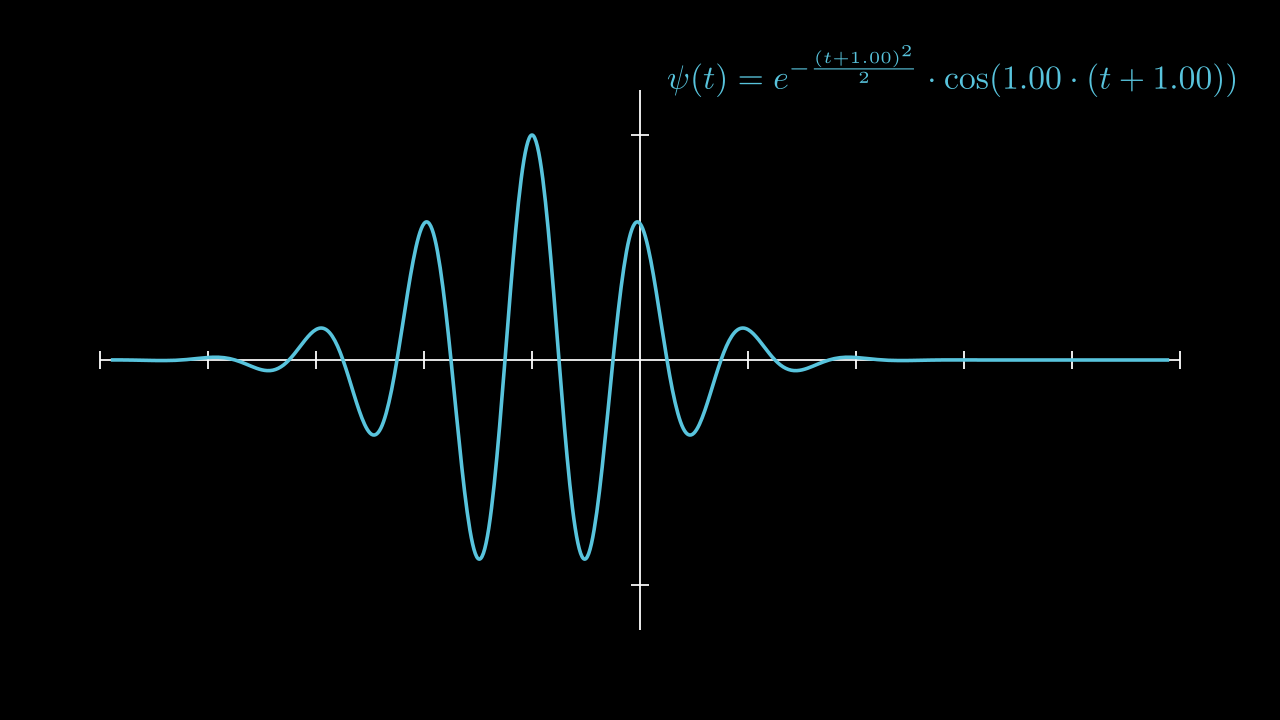

In [48]:
from typing import Callable
from itertools import chain
from manim import *


class WaveletMoving(Scene):
    @staticmethod
    def morlet_wavelet_factory(omega: float, tau: float) -> Callable[[float], float]:
        def morlet_wavelet(t: float) -> float:
            return np.exp(-((t - tau) ** 2) / 2) * np.cos(omega * TAU * (t - tau))

        return morlet_wavelet

    def construct(self):
        axes = Axes(
            x_range=[-5, 5],
            y_range=[-1.2, 1.2],
            tips=False,
        ).center().to_edge(DOWN, LARGE_BUFF)


        shifts = np.linspace(-1, 1, 41).round(2).tolist()
        wavelet = self.morlet_wavelet_factory(omega=shifts[0], tau=-1)
        wavelet_graph = axes.plot(wavelet, [SMALL_BUFF - 5, 5 - SMALL_BUFF], color=BLUE)
        wavelet_text = MathTex(r"\psi(t) = e^{-\frac{(t + 1.00)^2}{2}} \cdot \cos(1.00\cdot(t + 1.00))", color=BLUE, font_size=36).to_corner(UR)
        self.add(axes, wavelet_graph, wavelet_text)

        for shift in chain(shifts[1:], reversed(shifts)):
            last_wavelet_graph = wavelet_graph
            last_wavelet_text = wavelet_text
            wavelet = self.morlet_wavelet_factory(omega=1, tau=shift)
            wavelet_graph = axes.plot(wavelet, [SMALL_BUFF - 5, 5 - SMALL_BUFF], color=BLUE)
            wavelet_text = MathTex(fr"\psi(t) = e^{{-\frac{{(t{-shift:+.2f})^2}}{2}}}\cdot\cos(1.00\cdot(t{-shift:+.2f}))", color=BLUE, font_size=36).to_corner(UR)
            self.play(ReplacementTransform(last_wavelet_graph, wavelet_graph), rate_func=linear, run_time=0.1)
            self.remove(last_wavelet_text)
            self.add(wavelet_text)
        

%manim -qm -s -v WARNING WaveletMoving

Manim Community v0.18.1

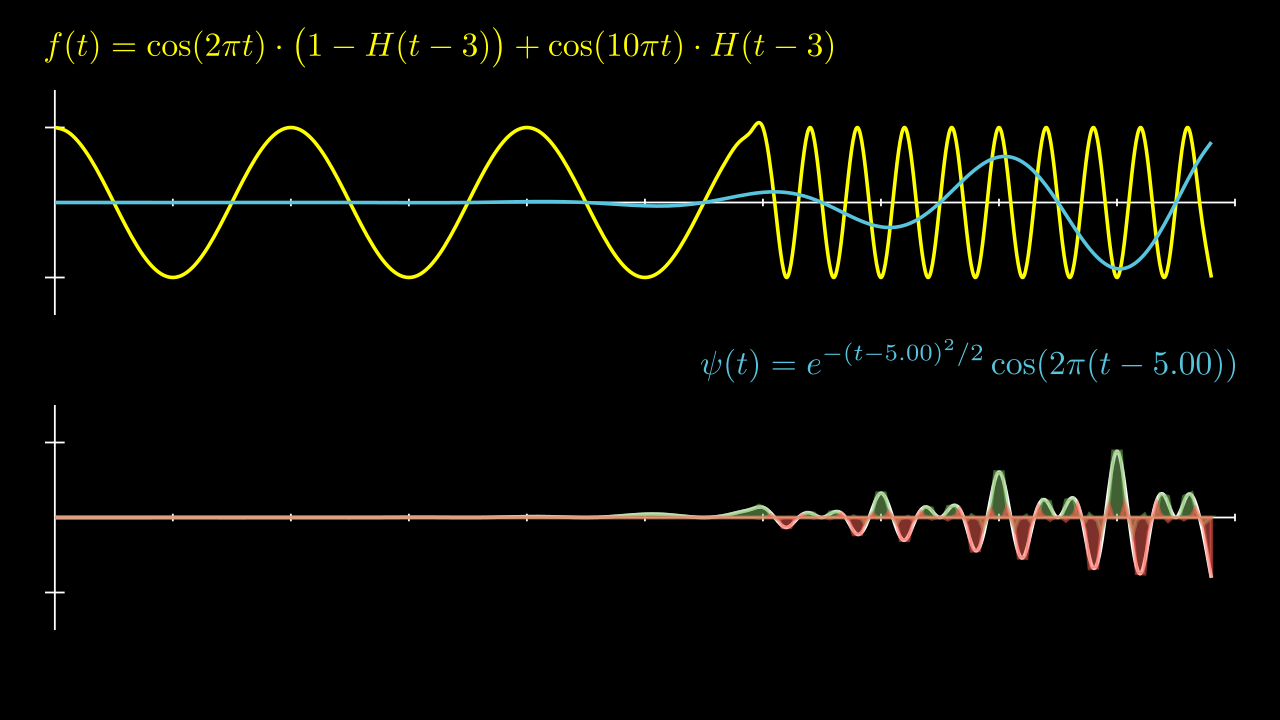

In [45]:
from typing import Callable
from manim import *


class MorletWaveletTransform(Scene):
    @staticmethod
    def morlet_wavelet_factory(omega: float, tau: float) -> Callable[[float], float]:
        def morlet_wavelet(t: float) -> float:
            return np.exp(-((t - tau) ** 2) / 2) * np.cos(omega * TAU * (t - tau))

        return morlet_wavelet
    
    def construct(self):
        t_min, t_max = 0, 5

        # Signal definition
        signal = lambda t: np.cos(1 * TAU * t) * (t < 3) + np.cos(5 * TAU * t) * (t >= 3)

        # Axes for signal
        signal_axes = Axes(
            x_range=[t_min, t_max, 0.5],
            y_range=[-1.5, 1.5],
            tips=False,
        )
        signal_axes.stretch_to_fit_width(config.frame_width - LARGE_BUFF)
        signal_axes.stretch_to_fit_height(2.5)
        signal_axes.to_edge(LEFT).to_edge(UP, LARGE_BUFF)

        # Signal plot
        signal_graph = signal_axes.plot(
            signal, [t_min, t_max - SMALL_BUFF], color=YELLOW
        )
        signal_text = MathTex(
            r"f(t) = \cos(2\pi t) \cdot \big(1 - H(t - 3)\big) + \cos(10\pi t) \cdot H(t - 3)", font_size=36, color=YELLOW
        )
        signal_text.next_to(signal_axes, UP).to_edge(LEFT)

        # Axes for inner product
        product_axes = Axes(
            x_range=[t_min, t_max, 0.5],
            y_range=[-1.5, 1.5],
            tips=False,
        )
        product_axes.stretch_to_fit_width(config.frame_width - LARGE_BUFF)
        product_axes.stretch_to_fit_height(2.5)
        product_axes.next_to(signal_axes, DOWN, LARGE_BUFF)

        shift_range = np.linspace(t_min, t_max, 101).round(2)  # Time shifts for the wavelet
        
        # first wavelet
        base_shift = shift_range[0]
        wavelet = self.morlet_wavelet_factory(1, base_shift)
        wavelet_graph = signal_axes.plot(wavelet, [t_min, t_max - SMALL_BUFF], color=BLUE)
        wavelet_text = MathTex(
            fr"\psi(t) = e^{{-(t - {base_shift})^2/2}}\cos(5\cdot 2\pi (t - {base_shift}))", font_size=36, color=BLUE
        )
        wavelet_text.next_to(product_axes, UP).to_edge(RIGHT)
        inner_product = lambda t: signal(t) * wavelet(t)
        inner_product_graph = product_axes.plot(inner_product, [t_min, t_max - SMALL_BUFF], color=WHITE)
        positive_area, negative_area = self.area_under_curve(product_axes, inner_product, (t_min, t_max - SMALL_BUFF))
        self.add(signal_axes, signal_graph, signal_text, product_axes, wavelet_graph, wavelet_text)
        self.add(inner_product_graph, positive_area, negative_area)
        wavelet_graphs, wavelet_texts, inner_product_graphs = [wavelet_graph], [wavelet_text], [inner_product_graph]
        pos_areas, neg_areas = [positive_area], [negative_area]

        for shift in shift_range[1:]:
            wavelet = self.morlet_wavelet_factory(1, shift)
            wavelet_graph = signal_axes.plot(wavelet, [t_min, t_max - SMALL_BUFF], color=BLUE)
            wavelet_text = MathTex(
                fr"\psi(t) = e^{{-(t - {shift:.2f})^2/2}}\cos(2\pi (t - {shift:.2f}))", font_size=36, color=BLUE
            )
            wavelet_text.next_to(product_axes, UP).to_edge(RIGHT)
            inner_product = lambda t: signal(t) * wavelet(t)
            inner_product_graph = product_axes.plot(inner_product, [t_min, t_max - SMALL_BUFF], color=WHITE)
            positive_area, negative_area = self.area_under_curve(product_axes, inner_product, (t_min, t_max - SMALL_BUFF))
            self.remove(wavelet_texts[-1])
            self.add(wavelet_text)
            self.play(
                ReplacementTransform(wavelet_graphs[-1], wavelet_graph, rate_func=linear, run_time=0.2),
                ReplacementTransform(inner_product_graphs[-1], inner_product_graph, rate_func=linear, run_time=0.2),
                ReplacementTransform(pos_areas[-1], positive_area, rate_func=linear, run_time=0.2),
                ReplacementTransform(neg_areas[-1], negative_area, rate_func=linear, run_time=0.2)
                
            )
            wavelet_graphs.append(wavelet_graph)
            wavelet_texts.append(wavelet_text)
            inner_product_graphs.append(inner_product_graph)
            pos_areas.append(positive_area)
            neg_areas.append(negative_area)


    def area_under_curve(self, axes: Axes, function: Callable[[float], float], x_range: tuple[float, float], opacity: float = 0.5) -> tuple[Polygon, Polygon]:
        positive_function = lambda t: max(function(t), 0)
        positive_function_graph = axes.plot(positive_function, x_range, color=WHITE)
        positive_area = axes.get_area(positive_function_graph, x_range, color=GREEN, opacity=opacity)
        negative_function = lambda t: min(function(t), 0)
        negative_function_graph = axes.plot(negative_function, x_range, color=WHITE)
        negative_area = axes.get_area(negative_function_graph, x_range, color=RED, opacity=opacity)
        return positive_area, negative_area

%manim -qm -v WARNING -s MorletWaveletTransform 